# CNN LeNet 5


## Loading and preprocessing the data


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = (
    X_train_.astype(np.float32) / 255.0,
    X_test_.astype(np.float32) / 255.0,
)

In [3]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# Reduce dimension size
np.random.seed(0)

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


## Resize image to 32x32


In [5]:
image_size = [32, 32]

X_train_resize = tf.image.resize(
    X_train,
    size=image_size,
    method=tf.image.ResizeMethod.BICUBIC,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None,
).numpy()

X_test_resize = tf.image.resize(
    X_test,
    size=image_size,
    method=tf.image.ResizeMethod.BICUBIC,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None,
).numpy()

print(X_train_resize.shape)
print(X_test_resize.shape)

(2000, 32, 32, 1)
(2000, 32, 32, 1)


## Model building


In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(1)

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape=(32, 32, 1)))

model.add(
    tf.keras.layers.Conv2D(
        filters=6,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        data_format="channels_last",
        name="C1",
        activation="tanh",
    )
)

model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, name="S2"))

model.add(
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        name="C3",
        activation="tanh",
    )
)

model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, name="S4"))

model.add(
    tf.keras.layers.Conv2D(
        filters=120,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding="valid",
        name="C5",
        activation="tanh",
    )
)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(84, name="F6", activation="tanh"))

model.add(tf.keras.layers.Dense(10, name="Out", activation="softmax"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 28, 28, 6)         156       
                                                                 
 S2 (AveragePooling2D)       (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 5, 5, 16)          0         
                                                                 
 C5 (Conv2D)                 (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0         
                                                                 
 F6 (Dense)                  (None, 84)                1

In [8]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [9]:
tf_fit = model.fit(X_train_resize, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


57/57 [==============================] - 1s 10ms/step - loss: 1.0443 - accuracy: 0.6850 - val_loss: 0.4917 - val_accuracy: 0.8750
Epoch 2/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4127 - accuracy: 0.8894 - val_loss: 0.4102 - val_accuracy: 0.9050
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.3316 - accuracy: 0.9061 - val_loss: 0.3624 - val_accuracy: 0.8900
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.2780 - accuracy: 0.9194 - val_loss: 0.3130 - val_accuracy: 0.9200
Epoch 5/20
57/57 [==============================] - 0s 7ms/step - loss: 0.2262 - accuracy: 0.9372 - val_loss: 0.3141 - val_accuracy: 0.9150
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.1936 - accuracy: 0.9472 - val_loss: 0.3454 - val_accuracy: 0.9200
Epoch 7/20
57/57 [==============================] - 0s 7ms/step - loss: 0.1620 - accuracy: 0.9539 - val_loss: 0.3141 - val_accuracy: 0.9250
Epoch 8/20
57/57 [============

In [10]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.044283,0.685000,0.491747,0.875
1,0.412738,0.889444,0.410233,0.905
2,0.331558,0.906111,0.362430,0.890
3,0.277967,0.919444,0.312982,0.920
4,0.226221,0.937222,0.314052,0.915


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

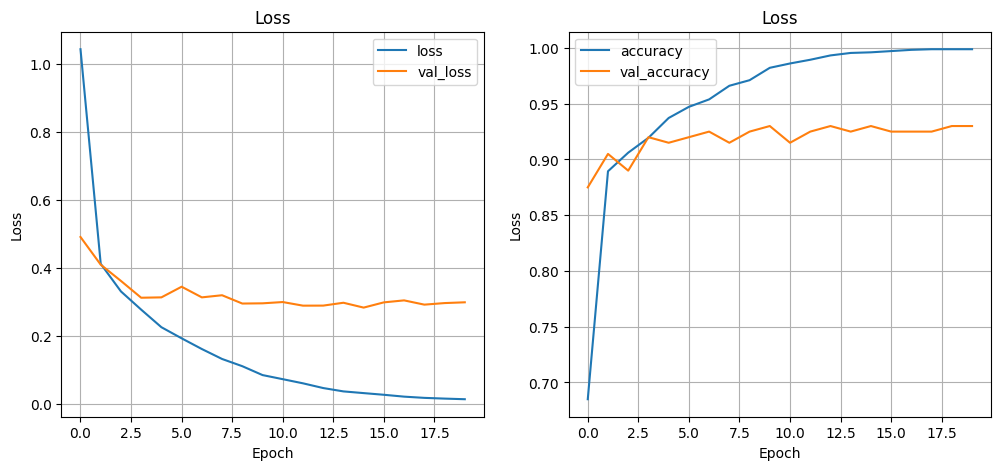

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

In [12]:
test_results = model.evaluate(X_test_resize, y_test)
print("\nTest Acc. {:.2f}%".format(test_results[1] * 100))

63/63 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.9060

Test Acc. 90.60%


In [13]:
# Find misclassification
y_pred_tf = model(X_test_resize)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf, axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f"Missclassification = {loc.sum()}")

(2000,)
(2000,)
Missclassification = 188


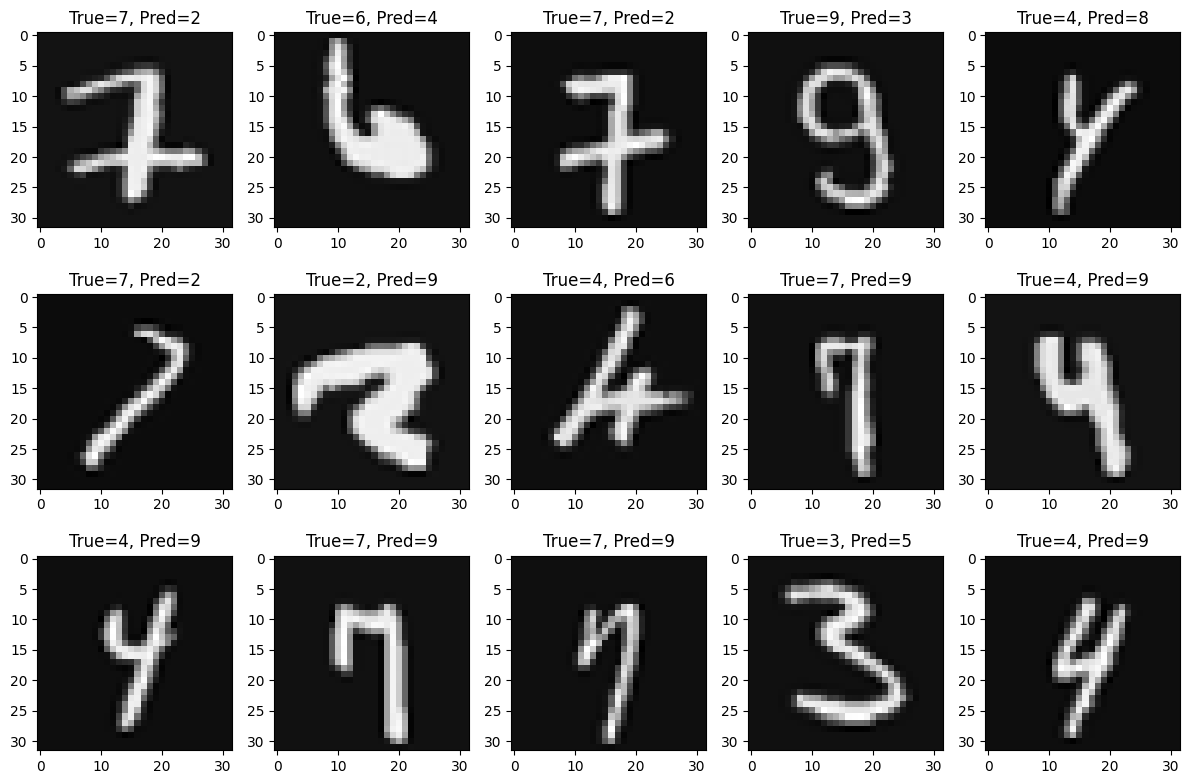

In [14]:
fig, axes2D = plt.subplots(3, 5, figsize=(12, 8))
axes = list(itertools.chain.from_iterable(axes2D))  # Flatten 2D list
X_test_miss = X_test_resize[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap="gray")
    ax.set_title(f"True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}")
fig.tight_layout()
plt.show()